# Basit Doğrusal Regresyon Modeli
### Model

In [82]:
import pandas as pd

df = pd.read_csv("C:/Users/hafize.ogut/Downloads/Data_Science_Algorthim/Dataset/Advertising.csv")
df = df.iloc[:,1: len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


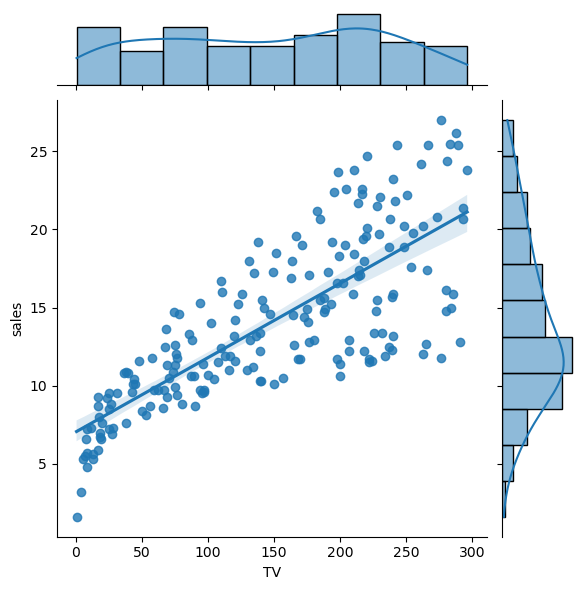

In [85]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");


In [87]:
from sklearn.linear_model import LinearRegression


In [90]:
X = df[["TV"]]#Bağımsız değişken
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [92]:
y = df[["sales"]]

In [94]:
reg = LinearRegression()

In [96]:
model = reg.fit(X,y)

In [98]:
model

LinearRegression()

In [79]:
str(model)

'LinearRegression()'

In [104]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',

In [108]:
model.intercept_ #b0 katsayısı

array([7.03259355])

In [114]:
model.coef_ #b1 katsayısı

array([[0.04753664]])

In [116]:
#r kare modelin score
model.score(X,y)#Elimizdeki bağımsız değişkenleri kullandığımızda bağımlı değişkendeki değişimin yüzde kaçını açıkayabiliyoruz


0.611875050850071

# Tahmin

(0.0, 28.27)

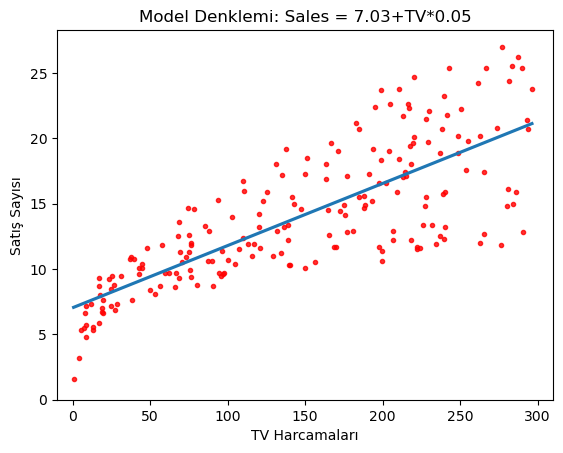

In [131]:
import seaborn as sns 
import matplotlib.pyplot as plt 
g = sns.regplot(x="TV",y="sales",data = df,ci = None,scatter_kws = {'color':'r','s':9})#Regresyon Görsellştirilmesi yapılıyor
g.set_title("Model Denklemi: Sales = 7.03+TV*0.05")#başlık
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0)

Sales = 7.03 + 0.05*TV

In [136]:
 7.03 + 0.05*165

15.280000000000001

In [148]:
model.intercept_ + model.coef_ * 165

array([[14.87613922]])

In [140]:
model.predict([[165]])

C:\Users\hafize.ogut\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [150]:
yeni_veri = [[5],[15],[30]]

In [154]:
model.predict(yeni_veri)

C:\Users\hafize.ogut\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# Artıklar ve Makine Öğrenmesinin Önemi
# MSE : Hata Kareler  Ortalaması
# RMSE : Hata Kareler Ortalamasının Karekökü

In [158]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [160]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [162]:
y.head(10)

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [174]:
gercek_y = y[0:10]

In [168]:
tamin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [176]:
hatalar = pd.concat([gercek_y,tamin_edilen_y], axis = 1)

In [180]:
hatalar.columns = ["gercek_y","tamin_edilen_y"]

In [182]:
hatalar

,gercek_y,tamin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [188]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tamin_edilen_y"]

In [190]:
hatalar

,gercek_y,tamin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [192]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [194]:
hatalar


,gercek_y,tamin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [198]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638104

# Multi Linear Regression (Çoklu Doğrusal Regresyon)